# GPcounts applied to scRNA-Seq time series data

Nuha BinTayyash, 2020

GPcounts is a Gaussian process regression package for counts data with negative binomial and zero-inflated negative binomial likelihoods as described in the paper "Non-parametric modelling of temporal and spatial counts data from RNA-seq experiments".


This notebook shows how to fit GPcounts with zero-inflated negative binomial, negative binomial and Gaussian likelihoods using full inference on ScRNA-seq gene expression data in Islet $\alpha$ cell from [GSE8737 single cell RNA-seq ](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE87375) dataset to find differentially expressed genes using infer trajectory and compare it with GPcounts with sparse inferece to obtain to obtain computational efficiency.

In [1]:
import pandas as pd
import numpy as np
import gpflow 
from IPython.display import display

Load $\alpha$ gene expression data and pseudotime information

In [2]:
Y = pd.read_csv('../data/normalized_alpha_counts.csv',index_col=[0])
X = pd.read_csv('../data/alpha_time_points.csv',index_col=[0])

In [3]:
from GPcounts.GPcounts_Module import Fit_GPcounts
from helper import plot 

In [4]:
genes_name = ['ENSMUSG00000015879','ENSMUSG00000059173']

Probabilty of zeros in Fam184b and Pde1a genes

In [5]:
Y.loc[genes_name][Y.loc[genes_name] == 0].count(axis=1)/len(Y.columns)

ENSMUSG00000015879    0.859756
ENSMUSG00000059173    0.628049
dtype: float64

## 1. Fit GPcounts with different negative binomial likelihood assuming full inference on Fam184b and Pde1a genes

In [6]:
gp_counts = Fit_GPcounts(X,Y.loc[genes_name]) 
likelihoods = ['Zero_inflated_negative_binomial','Negative_binomial','Gaussian']

100%|██████████| 2/2 [01:06<00:00, 33.03s/it]

The results for Zero_inflated_negative_binomial likelihood:


,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
ENSMUSG00000015879,-354.500295,-357.468896,2.968602
ENSMUSG00000059173,-758.197025,-784.398996,26.201970


100%|██████████| 2/2 [00:02<00:00,  1.33s/it]


name,class,transform,prior,trainable,shape,dtype,value
list[0].kernel.variance,Parameter,Softplus,,True,(),float64,7.368769676787012
list[0].kernel.lengthscales,Parameter,Softplus,,True,(),float64,0.21957949979813848
list[0].likelihood.alpha,Parameter,Softplus,,True,(),float64,0.42928703356114883
list[0].likelihood.km,Parameter,Softplus,,True,(),float64,243.72512012023782
list[0].q_mu,Parameter,,,True,"(328, 1)",float64,[[3.64140933e-01...
list[0].q_sqrt,Parameter,FillTriangular,,True,"(1, 328, 328)",float64,"[[[4.02581003e-01, 0.00000000e+00, 0.00000000e+00..."
list[1].kernel.variance,Parameter,Softplus,,True,(),float64,401.7077973023328
list[1].likelihood.alpha,Parameter,Softplus,,True,(),float64,0.4846704715174504
list[1].likelihood.km,Parameter,Softplus,,True,(),float64,289.693200498455
list[1].q_mu,Parameter,,,True,"(328, 1)",float64,[[0.19299801...


ENSMUSG00000015879


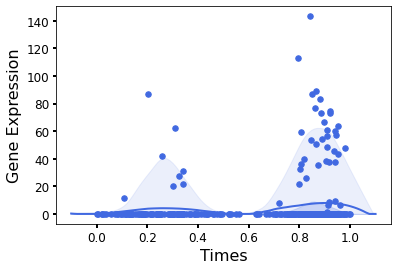

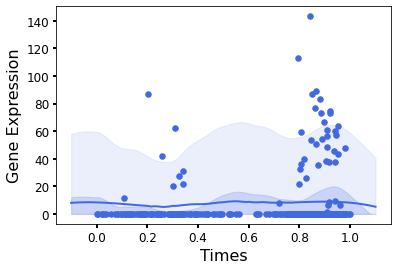

ENSMUSG00000059173


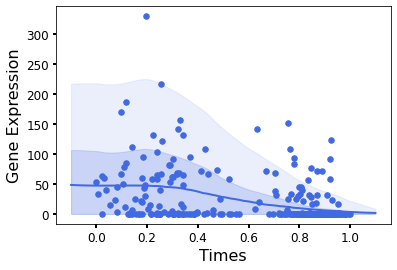

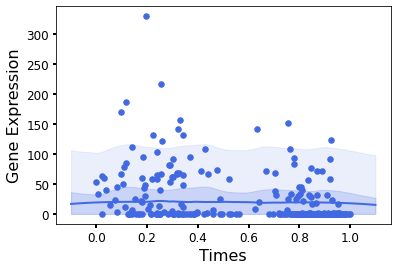

100%|██████████| 2/2 [00:12<00:00,  6.14s/it]

The results for Negative_binomial likelihood:


,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
ENSMUSG00000015879,-385.423248,-385.959712,0.536464
ENSMUSG00000059173,-797.366964,-807.318248,9.951283


100%|██████████| 2/2 [00:02<00:00,  1.28s/it]


name,class,transform,prior,trainable,shape,dtype,value
list[0].kernel.variance,Parameter,Softplus,,True,(),float64,2.8219510545331756
list[0].kernel.lengthscales,Parameter,Softplus,,True,(),float64,0.1410882574145243
list[0].likelihood.alpha,Parameter,Softplus,,True,(),float64,32.927452893859474
list[0].likelihood.scale,Parameter,,,False,(),float64,1.0
list[0].q_mu,Parameter,,,True,"(328, 1)",float64,[[-2.58965841e-01...
list[0].q_sqrt,Parameter,FillTriangular,,True,"(1, 328, 328)",float64,"[[[8.32537648e-01, 0.00000000e+00, 0.00000000e+00..."
list[1].kernel.variance,Parameter,Softplus,,True,(),float64,3.722894108465524
list[1].likelihood.alpha,Parameter,Softplus,,True,(),float64,35.32507145013555
list[1].likelihood.scale,Parameter,,,False,(),float64,1.0
list[1].q_mu,Parameter,,,True,"(328, 1)",float64,[[9.86424897e-01...


ENSMUSG00000015879


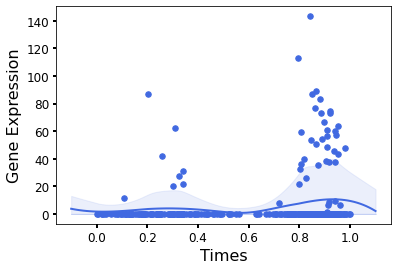

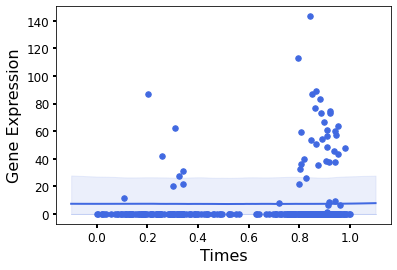

ENSMUSG00000059173


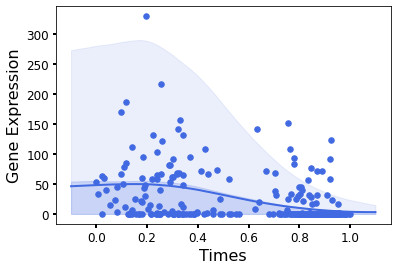

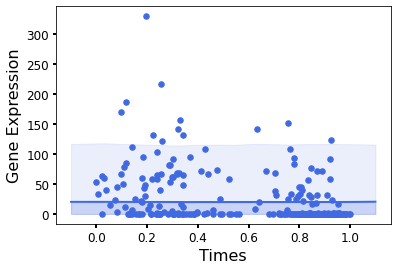

100%|██████████| 2/2 [00:02<00:00,  1.10s/it]

The results for Gaussian likelihood:


,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
ENSMUSG00000015879,-551.722537,-554.274201,2.551665
ENSMUSG00000059173,-623.552577,-663.040231,39.487653


100%|██████████| 2/2 [00:00<00:00, 16.08it/s]


name,class,transform,prior,trainable,shape,dtype,value
list[0].kernel.variance,Parameter,Softplus,,True,(),float64,0.333875
list[0].kernel.lengthscales,Parameter,Softplus,,True,(),float64,1.00395
list[0].likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1.66186
list[1].kernel.variance,Parameter,Softplus,,True,(),float64,0.254744
list[1].likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1.69877


ENSMUSG00000015879


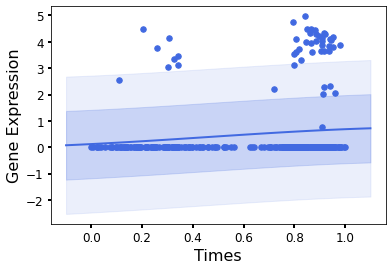

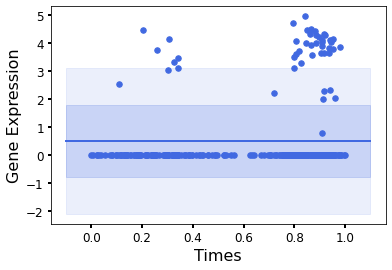

ENSMUSG00000059173


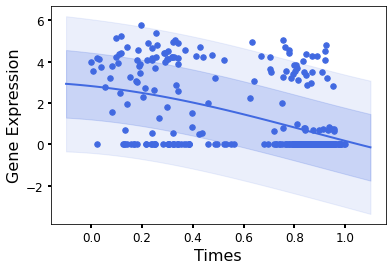

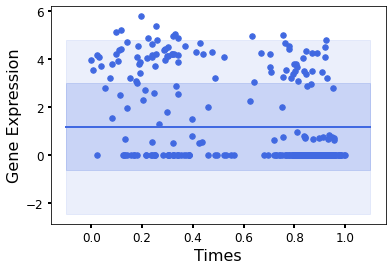

In [7]:
test = 'One_sample_test' # name of the test
xtest = np.linspace(np.min(X.values)-.1,np.max(X.values)+.1,100)[:,None] 
for likelihood in likelihoods:
    results = gp_counts.One_sample_test(likelihood)
    print('The results for '+likelihood+' likelihood:')
    display(results)
    params = gp_counts.load_models(genes_name,test,xtest,likelihood)
    gpflow.utilities.print_summary(params['models'][0], fmt='notebook')
    plot(params,test,likelihood,X.values,Y.loc[genes_name])

## 2. Fit GPcounts with different likelihoods assuming sparse inference  to obtain computational efficiency  on Fam184b and Pde1a genes

100%|██████████| 2/2 [00:36<00:00, 18.50s/it]

The results for Zero_inflated_negative_binomial likelihood:


,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
ENSMUSG00000015879,-354.448643,-356.299516,1.850873
ENSMUSG00000059173,-758.198411,-784.006040,25.807628


100%|██████████| 2/2 [00:02<00:00,  1.35s/it]


ENSMUSG00000015879


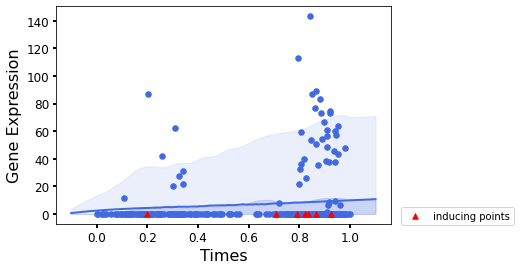

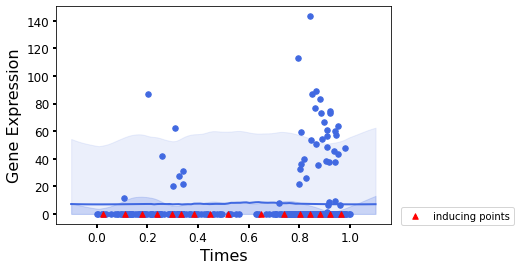

ENSMUSG00000059173


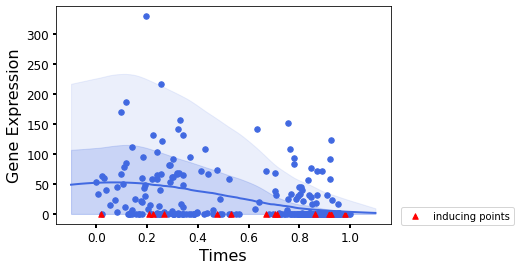

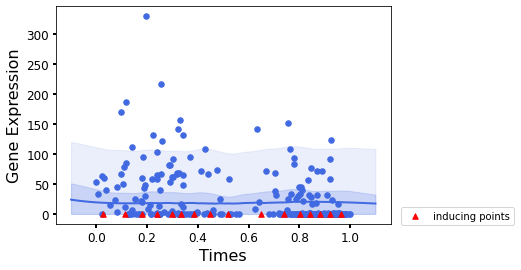

100%|██████████| 2/2 [00:08<00:00,  4.50s/it]

The results for Negative_binomial likelihood:


,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
ENSMUSG00000015879,-385.430558,-385.959709,0.529151
ENSMUSG00000059173,-797.367178,-807.318244,9.951066


100%|██████████| 2/2 [00:02<00:00,  1.27s/it]


ENSMUSG00000015879


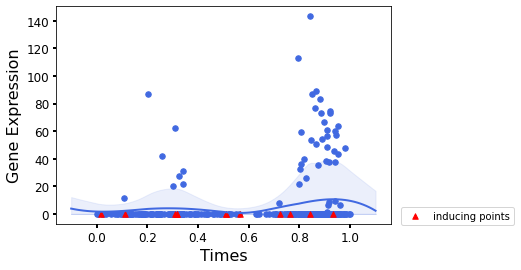

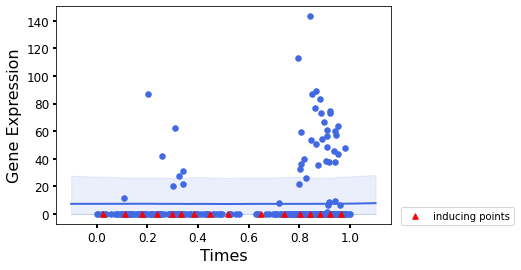

ENSMUSG00000059173


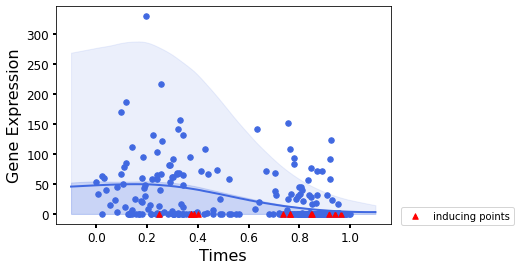

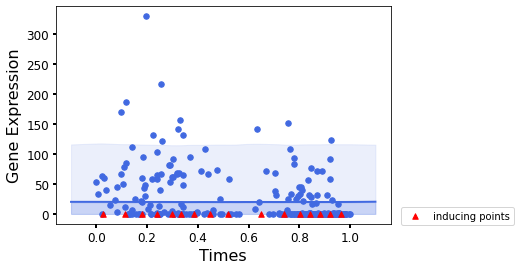

100%|██████████| 2/2 [00:02<00:00,  1.34s/it]

The results for Gaussian likelihood:


,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
ENSMUSG00000015879,-551.722571,-554.274207,2.551636
ENSMUSG00000059173,-623.552599,-663.040234,39.487635


100%|██████████| 2/2 [00:01<00:00,  1.96it/s]

ENSMUSG00000015879


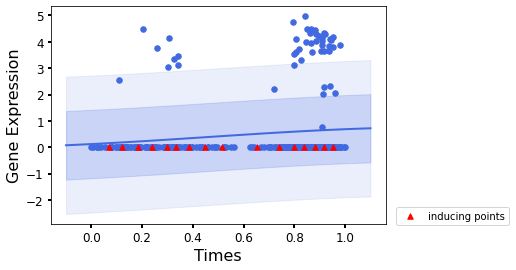

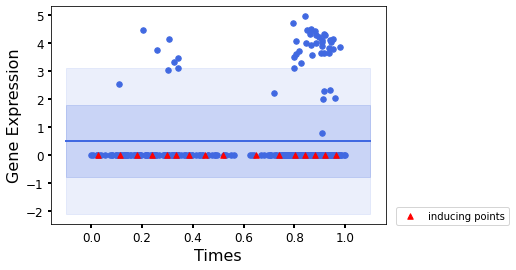

ENSMUSG00000059173


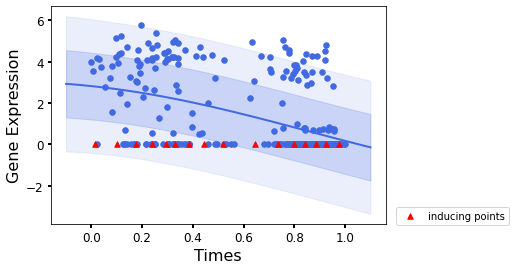

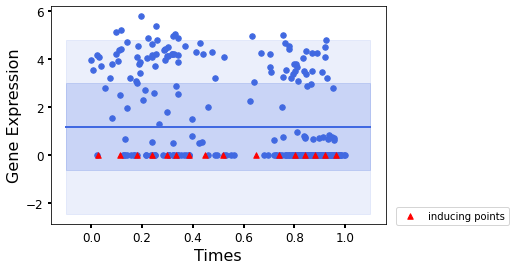

In [8]:
sparse = True 
gp_counts = Fit_GPcounts(X,Y.loc[genes_name],sparse = sparse) # use sparse inference
likelihoods = ['Zero_inflated_negative_binomial','Negative_binomial','Gaussian']
test = 'One_sample_test' # name of the test

for likelihood in likelihoods:
    results_sparse = gp_counts.One_sample_test(likelihood)
    print('The results for '+likelihood+' likelihood:')
    display(results_sparse)
    params = gp_counts.load_models(genes_name,test,xtest,likelihood)
    plot(params,test,likelihood,X.values,Y.loc[genes_name],sparse)